### Классификация
#### 1. Импортируем библиотеки и датасет (геометрические свойства трех видов пшеницы).

In [2]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, plotly.express as px
from sklearn import tree,ensemble,model_selection,metrics,neighbors
from warnings import filterwarnings as fw
fw('ignore')

In [3]:
data = pd.read_csv('seeds.csv')
data.head()

,area,perimeter,compactness,kernellength,kernelwidth,assymetry,groovelength,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


Отберем в отдельные датафреймы характеристики объектов и метки классов. 
<br>Затем поделим датасет на обучающую и тестовую выборки в классическом соотношении 1:4.

In [4]:
x = data.iloc[:,:7]
y = data.iloc[:,7:]
xtrain,xtest,ytrain,ytest = model_selection.train_test_split(x,y,test_size=0.2)
print('xtrain: ', xtrain.shape, 'ytrain: ', ytrain.shape, '\nxtest: ', xtest.shape, 'ytest: ', ytest.shape)
ytest=ytest.to_numpy().flatten()

xtrain:  (168, 7) ytrain:  (168, 1) 
xtest:  (42, 7) ytest:  (42, 1)


#### 2. Построим дерево решений со значениями по умолчанию.

Оценим результат с помощью таких метрик, как precision, recall, f1-score, а также AUC и матриц ошибок.

In [5]:
DTC = tree.DecisionTreeClassifier()
DTC.fit(xtrain,ytrain)
ypred = DTC.predict(xtest)
print(metrics.classification_report(ytest,ypred,digits=5))
print('AUC (area under ROC curve) = ', metrics.roc_auc_score(ytest,DTC.predict_proba(xtest),average='macro',multi_class='ovr'))

              precision    recall  f1-score   support

           1    0.76471   0.86667   0.81250        15
           2    1.00000   0.85714   0.92308        14
           3    0.84615   0.84615   0.84615        13

    accuracy                        0.85714        42
   macro avg    0.87029   0.85665   0.86058        42
weighted avg    0.86835   0.85714   0.85978        42

AUC (area under ROC curve) =  0.8921416174289738


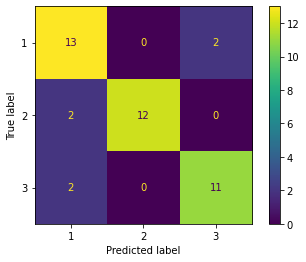

In [6]:
metrics.ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(ytest,ypred), display_labels=DTC.classes_).plot()

Участвующие показатели и их важность:

In [7]:
for i in range(7):
    if DTC.feature_importances_[i] !=0:
        print(data.columns[i], ' - ', DTC.feature_importances_[i])

area  -  0.36226018297197965
perimeter  -  0.014287232911661523
assymetry  -  0.0945535967849611
groovelength  -  0.5288989873313976


Дерево решений:

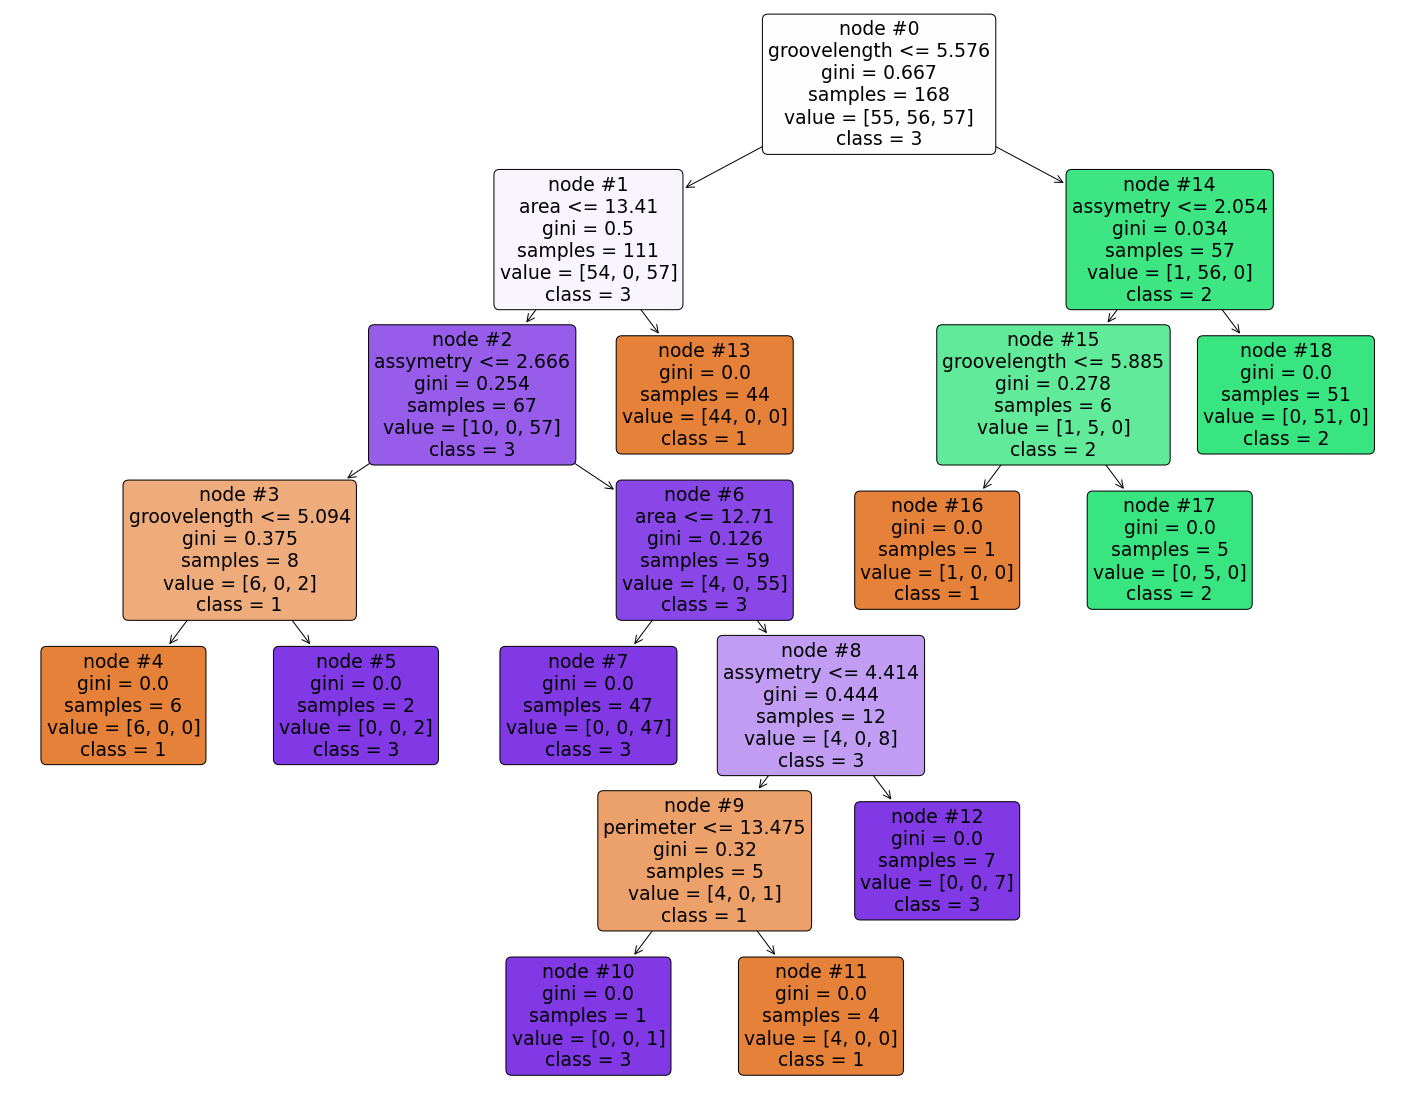

In [8]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(DTC, 
                   feature_names=['area','perimeter','compactness','kernellength','kernelwidth','assymetry','groovelength'],  
                   class_names=['1','2','3'],
                   filled=True,
                   rounded=True, 
                   node_ids=True)

##### Построим дерево решений с максимальной числом уровней в 2.

In [9]:
DTC = tree.DecisionTreeClassifier(max_depth=2)
DTC.fit(xtrain,ytrain)
ypred = DTC.predict(xtest)
print(metrics.classification_report(ytest,ypred,digits=5))
print('AUC (area under ROC curve) = ', metrics.roc_auc_score(ytest,DTC.predict_proba(xtest),average='macro',multi_class='ovr'))

              precision    recall  f1-score   support

           1    0.84615   0.73333   0.78571        15
           2    1.00000   0.85714   0.92308        14
           3    0.76471   1.00000   0.86667        13

    accuracy                        0.85714        42
   macro avg    0.87029   0.86349   0.85849        42
weighted avg    0.87223   0.85714   0.85656        42

AUC (area under ROC curve) =  0.9161649334063128


Матрица ошибок:

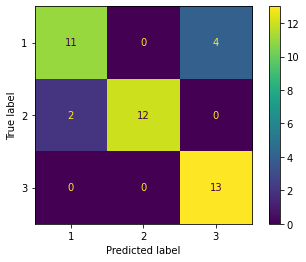

In [10]:
metrics.ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(ytest,ypred), display_labels=DTC.classes_).plot()

Участвующие показатели и их важность:

In [11]:
for i in range(7):
    if DTC.feature_importances_[i] !=0:
        print(data.columns[i], ' - ', DTC.feature_importances_[i])

area  -  0.41202416518196067
assymetry  -  0.0031964075794509066
groovelength  -  0.5847794272385883


Дерево решений:

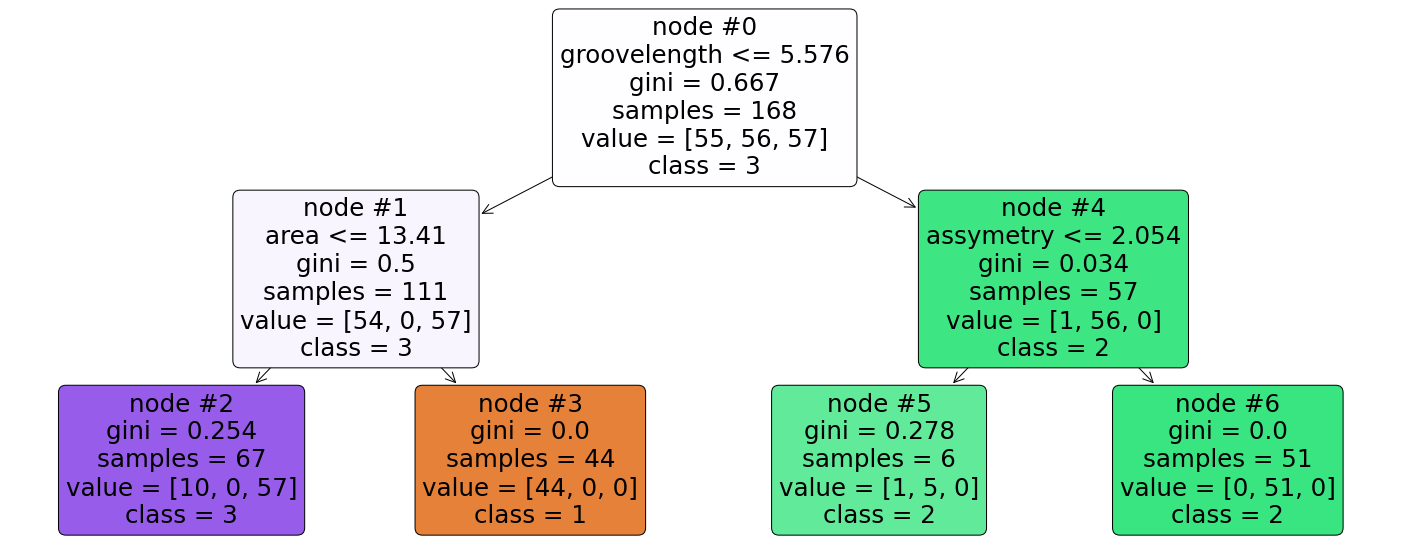

In [12]:
fig = plt.figure(figsize=(25,10))
_ = tree.plot_tree(DTC, 
                   feature_names=['area','perimeter','compactness','kernellength','kernelwidth','assymetry','groovelength'],  
                   class_names=['1','2','3'],
                   filled=True,
                   rounded=True, 
                   node_ids=True)

##### Построим дерево решений с минимальным числом объектов узла в 6.

In [13]:
DTC = tree.DecisionTreeClassifier(min_samples_leaf=10)
DTC.fit(xtrain,ytrain)
ypred = DTC.predict(xtest)
print(metrics.classification_report(ytest,ypred,digits=5))
print('AUC (area under ROC curve) = ', metrics.roc_auc_score(ytest,DTC.predict_proba(xtest),average='macro',multi_class='ovr'))

              precision    recall  f1-score   support

           1    0.71429   1.00000   0.83333        15
           2    1.00000   0.85714   0.92308        14
           3    1.00000   0.69231   0.81818        13

    accuracy                        0.85714        42
   macro avg    0.90476   0.84982   0.85820        42
weighted avg    0.89796   0.85714   0.85856        42

AUC (area under ROC curve) =  0.9468948675845228


Матрица ошибок:

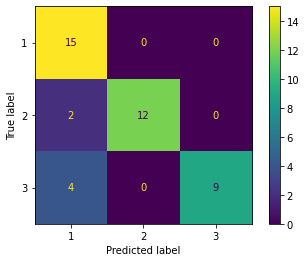

In [14]:
metrics.ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(ytest,ypred), display_labels=DTC.classes_).plot()

Участвующие показатели и их важность:

In [15]:
for i in range(7):
    if DTC.feature_importances_[i] !=0:
        print(data.columns[i], ' - ', DTC.feature_importances_[i])

area  -  0.3879510867281823
perimeter  -  0.00649261023911138
assymetry  -  0.057295247286581044
groovelength  -  0.5482610557461252


Дерево решений:

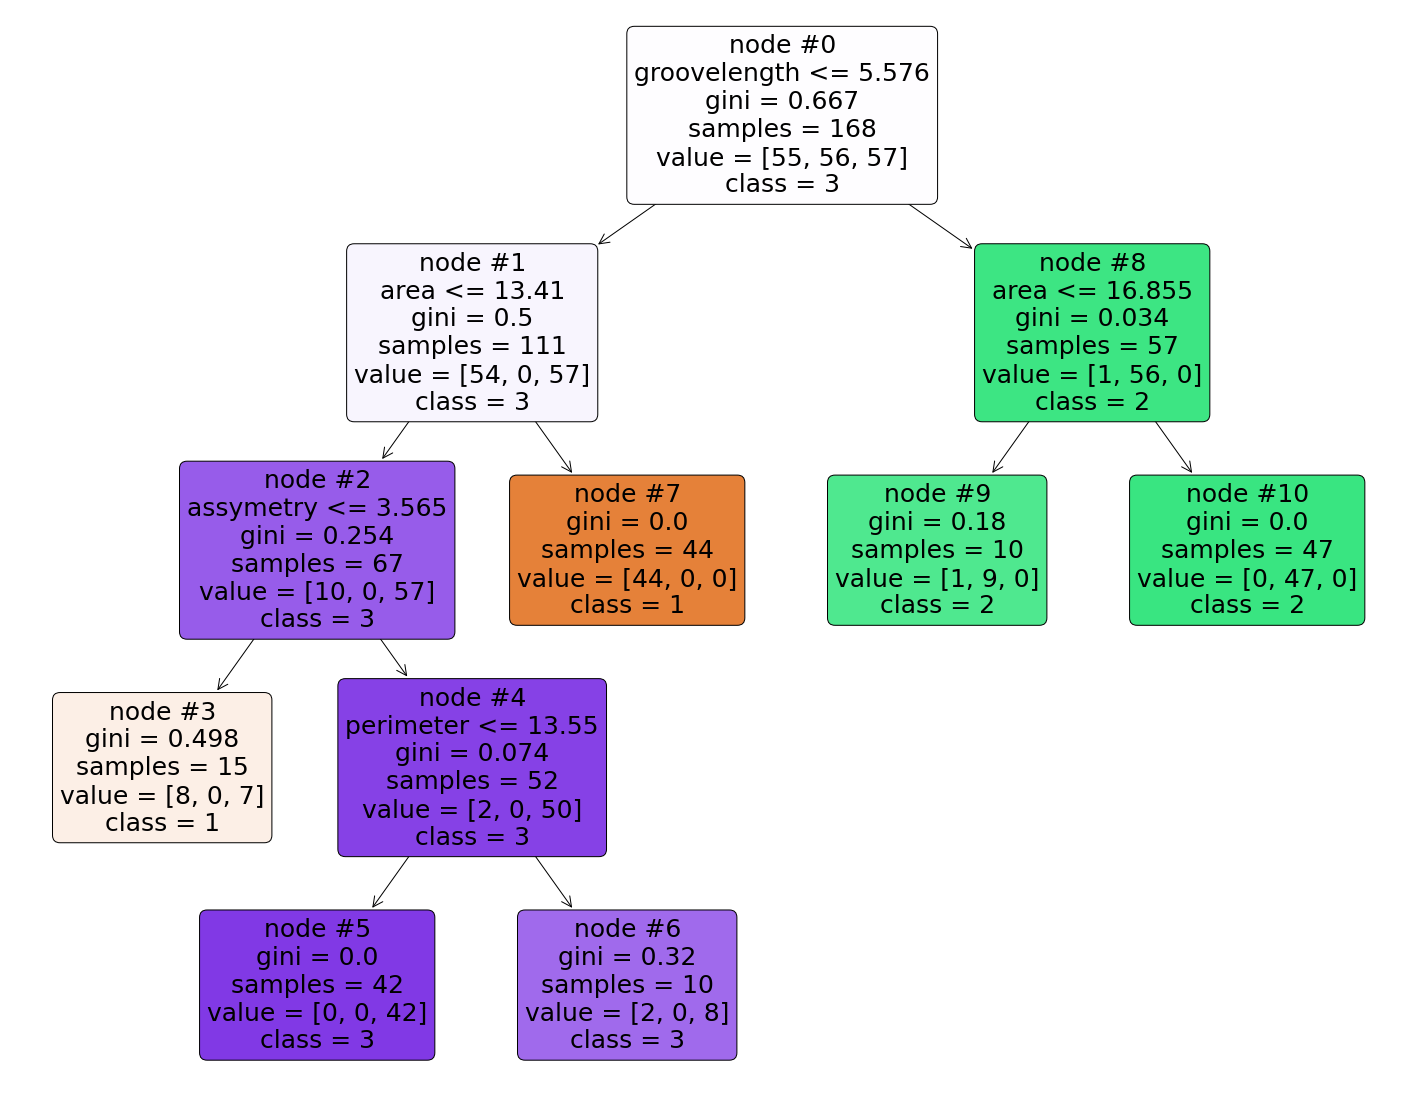

In [16]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(DTC, 
                   feature_names=['area','perimeter','compactness','kernellength','kernelwidth','assymetry','groovelength'],  
                   class_names=['1','2','3'],
                   filled=True,
                   rounded=True, 
                   node_ids=True)

#### 3. Модель RandomForest.

##### Построим модель на значениях по умолчанию: 100 деревьев, sqrt(n) параметров, полные деревья.

In [17]:
RFC = ensemble.RandomForestClassifier()
RFC.fit(xtrain,ytrain.to_numpy().flatten())
ypredRFC = RFC.predict(xtest)
print(metrics.classification_report(ytest,ypredRFC,digits=5))
print('AUC (area under ROC curve) = ', metrics.roc_auc_score(ytest,RFC.predict_proba(xtest),average='macro',multi_class='ovr'))

              precision    recall  f1-score   support

           1    0.81250   0.86667   0.83871        15
           2    1.00000   0.85714   0.92308        14
           3    0.85714   0.92308   0.88889        13

    accuracy                        0.88095        42
   macro avg    0.88988   0.88230   0.88356        42
weighted avg    0.88882   0.88095   0.88236        42

AUC (area under ROC curve) =  0.9798932219840814


##### Построим модель, сократив количество деревьев вдвое: 50 деревьев, sqrt(n) параметров, полные деревья.

In [18]:
RFC = ensemble.RandomForestClassifier(n_estimators=50)
RFC.fit(xtrain,ytrain.to_numpy().flatten())
ypredRFC = RFC.predict(xtest)
print(metrics.classification_report(ytest,ypredRFC,digits=5))
print('AUC (area under ROC curve) = ', metrics.roc_auc_score(ytest,RFC.predict_proba(xtest),average='macro',multi_class='ovr'))

              precision    recall  f1-score   support

           1    0.75000   1.00000   0.85714        15
           2    1.00000   0.85714   0.92308        14
           3    1.00000   0.76923   0.86957        13

    accuracy                        0.88095        42
   macro avg    0.91667   0.87546   0.88326        42
weighted avg    0.91071   0.88095   0.88297        42

AUC (area under ROC curve) =  0.9794615136227068


##### Построим модель, расширив максимальное количество параметров до 7: 100 деревьев, все параметры, полные деревья.

In [47]:
RFC = ensemble.RandomForestClassifier(max_features=7)
RFC.fit(xtrain,ytrain.to_numpy().flatten())
ypredRFC = RFC.predict(xtest)
print(metrics.classification_report(ytest,ypredRFC,digits=5))
print('AUC (area under ROC curve) = ', metrics.roc_auc_score(ytest,RFC.predict_proba(xtest),average='macro',multi_class='ovr'))

              precision    recall  f1-score   support

           1    0.81250   0.86667   0.83871        15
           2    1.00000   0.85714   0.92308        14
           3    0.85714   0.92308   0.88889        13

    accuracy                        0.88095        42
   macro avg    0.88988   0.88230   0.88356        42
weighted avg    0.88882   0.88095   0.88236        42

AUC (area under ROC curve) =  0.9520776513113679


##### Построим модель, сократив число уровней деревьев: 100 деревьев, sqrt(n) параметров, деревья с числом уровней не более 2.

In [41]:
RFC = ensemble.RandomForestClassifier(max_depth=2)
RFC.fit(xtrain,ytrain.to_numpy().flatten())
ypredRFC = RFC.predict(xtest)
print(metrics.classification_report(ytest,ypredRFC,digits=5))
print('AUC (area under ROC curve) = ', metrics.roc_auc_score(ytest,RFC.predict_proba(xtest),average='macro',multi_class='ovr'))

              precision    recall  f1-score   support

           1    0.78571   0.73333   0.75862        15
           2    1.00000   0.85714   0.92308        14
           3    0.75000   0.92308   0.82759        13

    accuracy                        0.83333        42
   macro avg    0.84524   0.83785   0.83643        42
weighted avg    0.84609   0.83333   0.83479        42

AUC (area under ROC curve) =  0.9689218265162437


##### Для модели с наибольшей оценкой (со значениями по умолчанию) построим три дерева, входящих в нее.

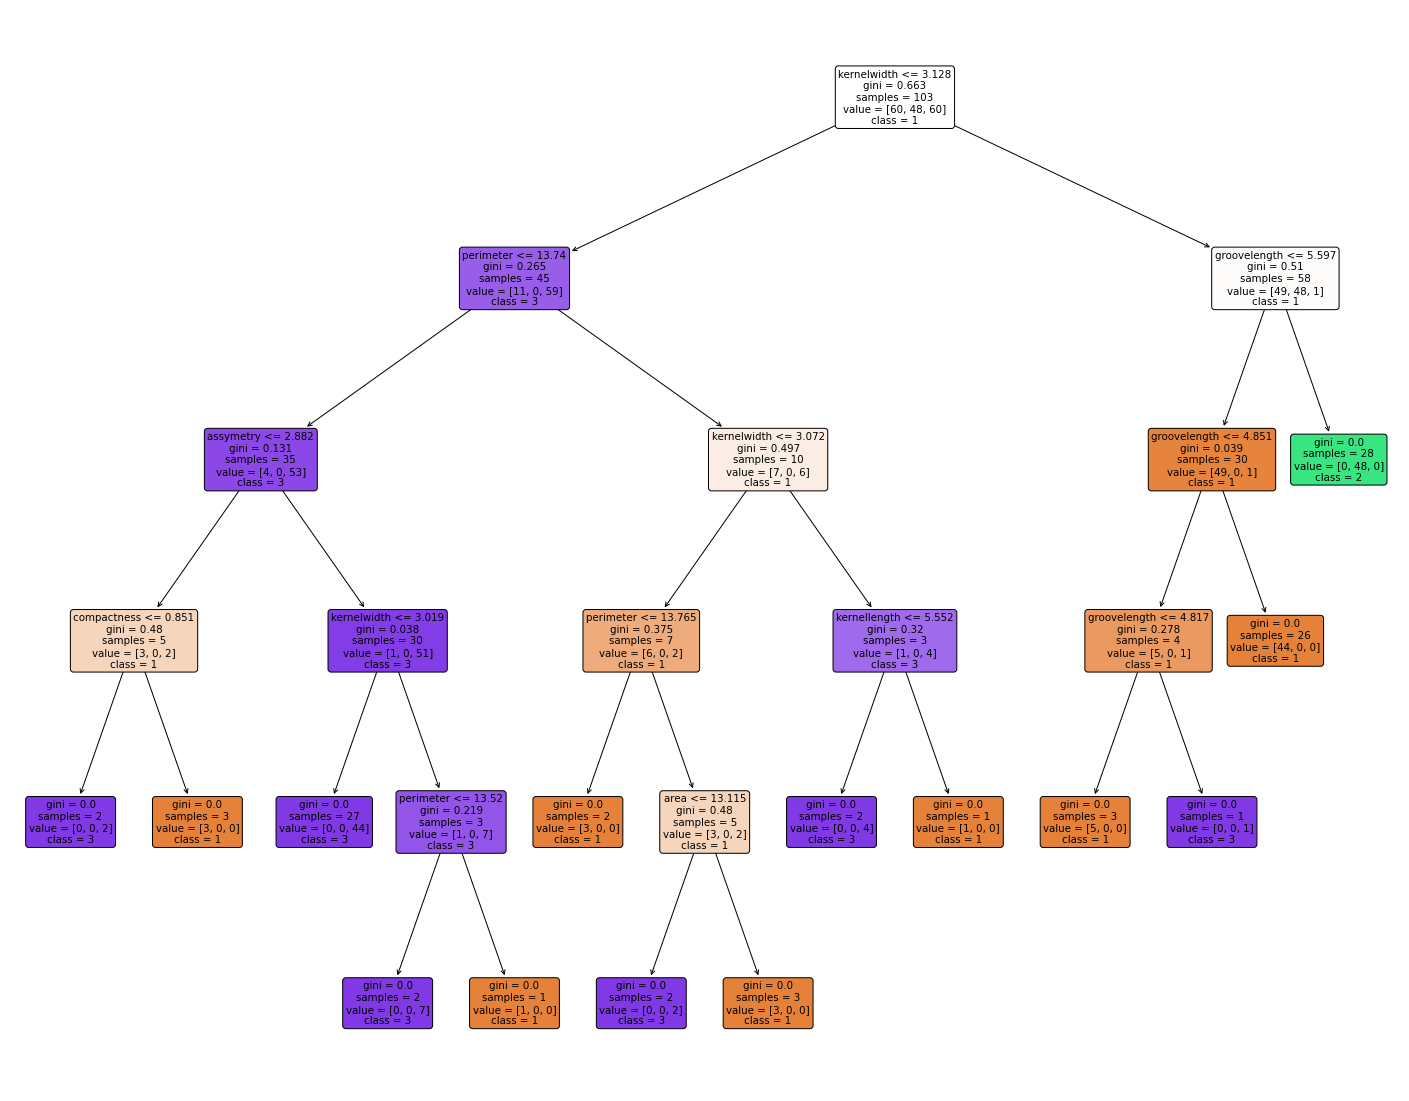

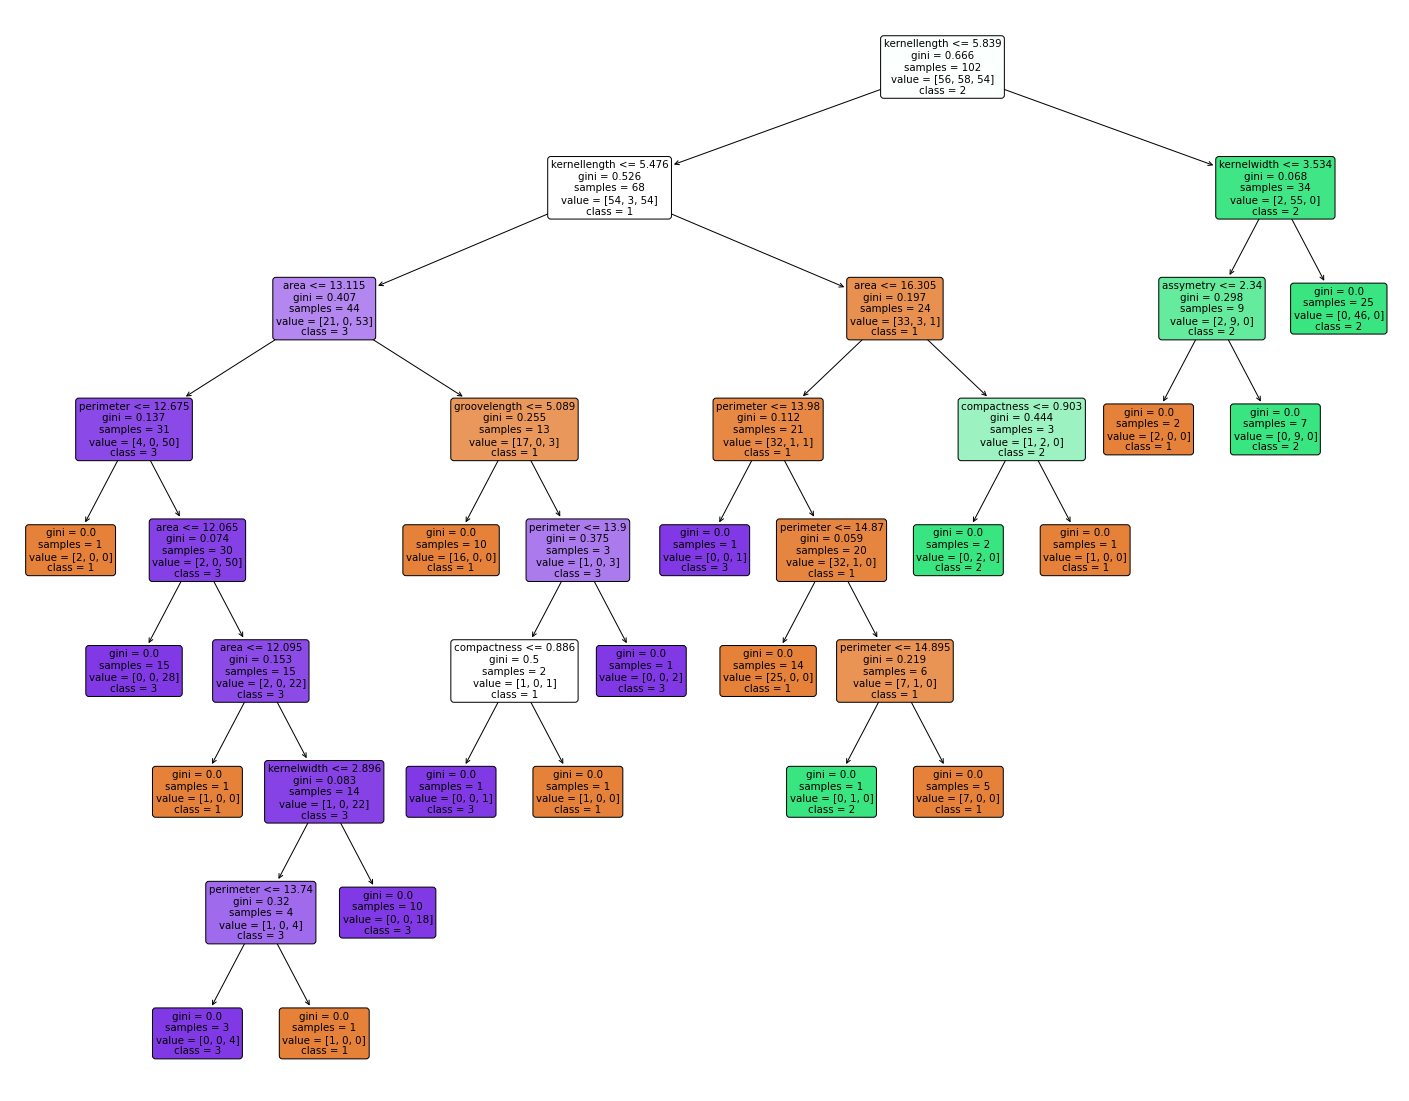

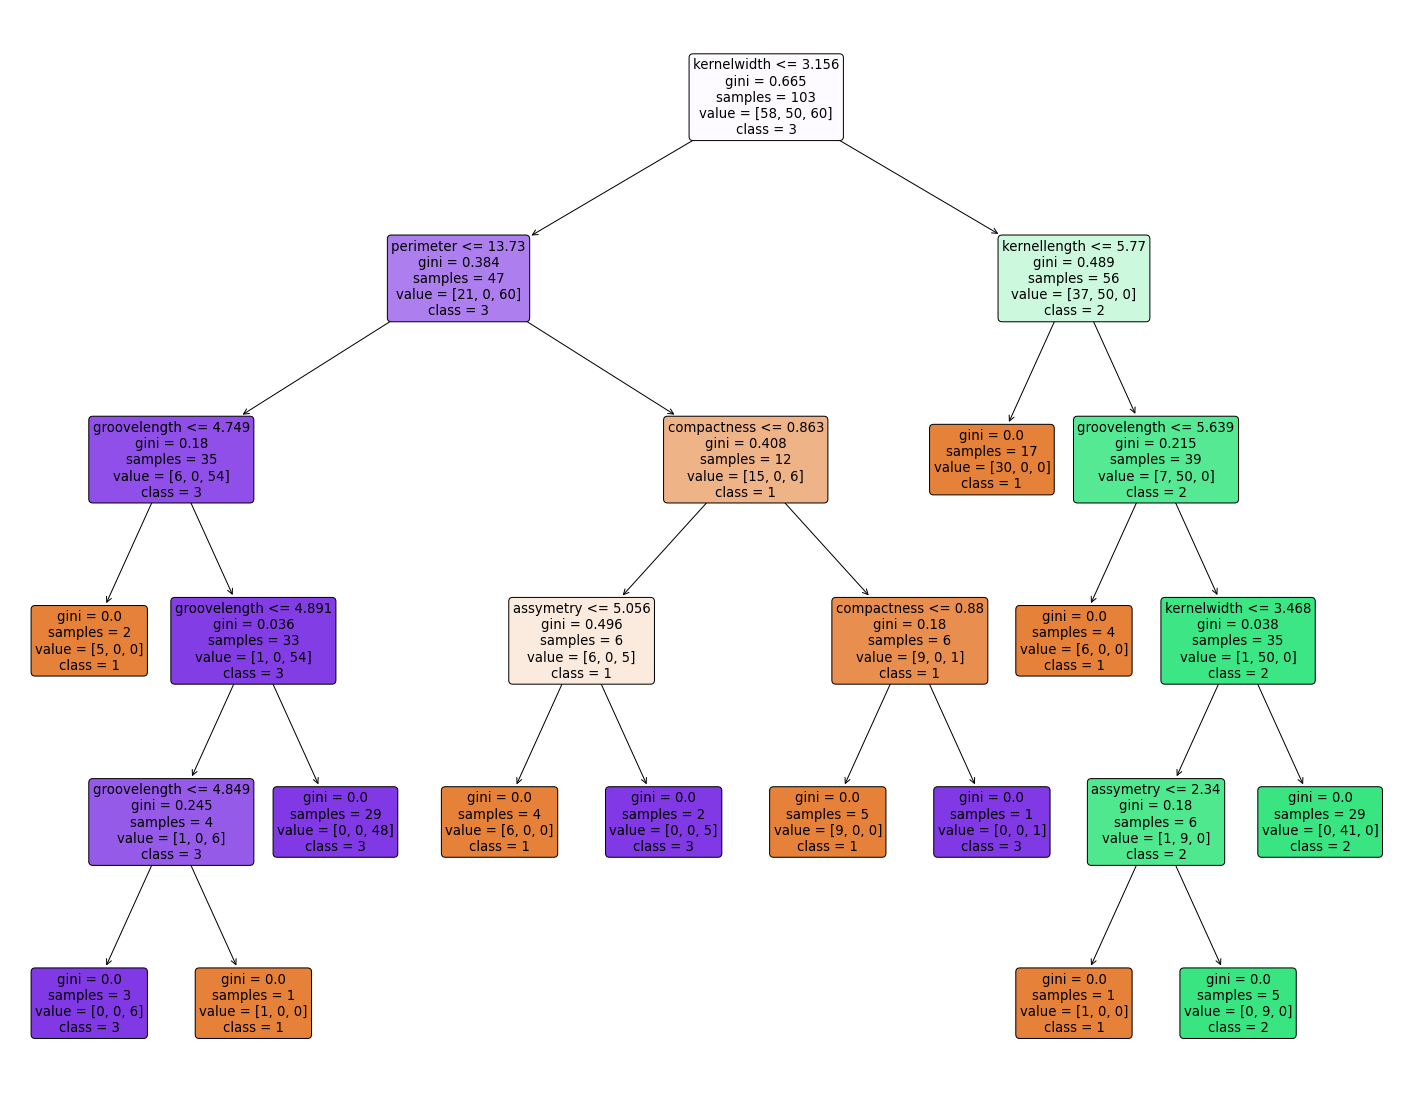

In [21]:
RFC = ensemble.RandomForestClassifier()
RFC.fit(xtrain,ytrain.to_numpy().flatten())

for i in range(3):
    fig = plt.figure(figsize=(25,20))
    a = tree.plot_tree(RFC.estimators_[i*49], 
                    feature_names=['area','perimeter','compactness','kernellength','kernelwidth','assymetry','groovelength'],  
                    class_names=['1','2','3'],
                    filled=True,
                    rounded=True)

#### 4. Оценим важность показателей с помощью RandomForest.

In [22]:
for i in range(7):
    print(data.columns[i], ' - ', RFC.feature_importances_[i])

area  -  0.21554970622217667
perimeter  -  0.18543008211585119
compactness  -  0.05468590674556353
kernellength  -  0.1351677681939644
kernelwidth  -  0.12210569683849545
assymetry  -  0.08222572094626057
groovelength  -  0.20483511893768833


Таким образом, наши показатели в порядке убывания важности:
<br> groovelength > perimeter > area > kernelwidth > kernellength > assymetry > compactness
<br> Построим диаграммы размаха для трех наиболее важных показателей.

In [23]:
px.box(data[['groovelength','class']], x='class', y='groovelength', title='groovelength distribution by classes')

In [24]:
px.box(data[['perimeter','class']], x='class', y='perimeter', title='perimeter distribution by classes')

In [25]:
px.box(data[['area','class']], x='class', y='area', title='area distribution by classes')

Построим scatterplot для двух наиболее важных показателей для наглядной иллюстрации классов.

In [26]:
px.scatter(data,x=data['groovelength'],y=data['perimeter'],color=data['class'])

Построим scatterplot для показателей area и perimeter для иллюстрации возможности линейного деления на классы по двум параметрам (но с малой точностью).

In [50]:
px.scatter(data,x=data['area'],y=data['perimeter'],color=data['class'])

#### 5. Построение моделей Decision tree на полном наборе показателей, на 20% самых важных, на 80% наименее важных.

In [27]:
DTC = tree.DecisionTreeClassifier()
DTC.fit(xtrain,ytrain)
ypred = DTC.predict(xtest)
print(metrics.classification_report(ytest,ypred,digits=5))
print('AUC (area under ROC curve) = ', metrics.roc_auc_score(ytest,DTC.predict_proba(xtest),average='macro',multi_class='ovr'))

              precision    recall  f1-score   support

           1    0.76471   0.86667   0.81250        15
           2    1.00000   0.85714   0.92308        14
           3    0.84615   0.84615   0.84615        13

    accuracy                        0.85714        42
   macro avg    0.87029   0.85665   0.86058        42
weighted avg    0.86835   0.85714   0.85978        42

AUC (area under ROC curve) =  0.8921416174289738


In [28]:
DTC = tree.DecisionTreeClassifier()
DTC.fit(xtrain[['groovelength','perimeter']],ytrain)
ypred = DTC.predict(xtest[['groovelength','perimeter']])
print(metrics.classification_report(ytest,ypred,digits=5))
print('AUC (area under ROC curve) = ', metrics.roc_auc_score(ytest,DTC.predict_proba(xtest[['groovelength','perimeter']]),average='macro',multi_class='ovr'))

              precision    recall  f1-score   support

           1    0.83333   1.00000   0.90909        15
           2    1.00000   0.85714   0.92308        14
           3    1.00000   0.92308   0.96000        13

    accuracy                        0.92857        42
   macro avg    0.94444   0.92674   0.93072        42
weighted avg    0.94048   0.92857   0.92951        42

AUC (area under ROC curve) =  0.9448514448514449


In [29]:
DTC = tree.DecisionTreeClassifier()
DTC.fit(xtrain[['area','compactness','kernellength','kernelwidth','assymetry']],ytrain)
ypred = DTC.predict(xtest[['area','compactness','kernellength','kernelwidth','assymetry']])
print(metrics.classification_report(ytest,ypred,digits=5))
print('AUC (area under ROC curve) = ', metrics.roc_auc_score(ytest,DTC.predict_proba(xtest[['area','compactness','kernellength','kernelwidth','assymetry']]),average='macro',multi_class='ovr'))

              precision    recall  f1-score   support

           1    0.75000   0.80000   0.77419        15
           2    0.92308   0.85714   0.88889        14
           3    0.84615   0.84615   0.84615        13

    accuracy                        0.83333        42
   macro avg    0.83974   0.83443   0.83641        42
weighted avg    0.83745   0.83333   0.83470        42

AUC (area under ROC curve) =  0.8750781253654817


#### 6. Коллективные древовидные модели на базе бустинга: AdaBoost и GradientBoost
Используем AdaBoost со значениями по умолчанию:
<br> Оценим результат с помощью таких метрик, как precision, recall, f1-score, а также AUC и матриц ошибок.

In [30]:
ABC = ensemble.AdaBoostClassifier()
ABC.fit(xtrain,ytrain)
ABCpred = ABC.predict(xtest)
print(metrics.classification_report(ytest,ABCpred,digits=5))
print('AUC (area under ROC curve) = ', metrics.roc_auc_score(ytest,ABC.predict_proba(xtest),average='macro',multi_class='ovr'))

              precision    recall  f1-score   support

           1    0.78571   0.73333   0.75862        15
           2    1.00000   0.85714   0.92308        14
           3    0.75000   0.92308   0.82759        13

    accuracy                        0.83333        42
   macro avg    0.84524   0.83785   0.83643        42
weighted avg    0.84609   0.83333   0.83479        42

AUC (area under ROC curve) =  0.8917607423491386


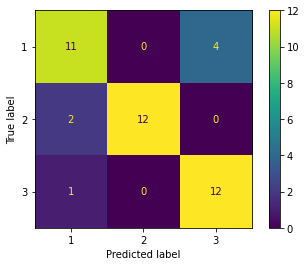

In [31]:
metrics.ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(ytest,ABCpred), display_labels=DTC.classes_).plot()

Теперь используем дерево решений, построенное в пункте 2 в качестве базового классификатора, чтобы получить лучший результат.

In [32]:
DTC = tree.DecisionTreeClassifier(max_depth=2)
DTC.fit(xtrain,ytrain)
DTCpred = ABC.predict(xtest)
print('Before boosting: ')
print(metrics.classification_report(ytest,DTCpred,digits=5))
print('AUC (area under ROC curve) = ', metrics.roc_auc_score(ytest,DTC.predict_proba(xtest),average='macro',multi_class='ovr'))
ABC = ensemble.AdaBoostClassifier(base_estimator=DTC)
ABC.fit(xtrain,ytrain)
ABCpred = ABC.predict(xtest)
print('After boosting: ')
print(metrics.classification_report(ytest,ABCpred,digits=5))
print('AUC (area under ROC curve) = ', metrics.roc_auc_score(ytest,ABC.predict_proba(xtest),average='macro',multi_class='ovr'))

Before boosting: 
              precision    recall  f1-score   support

           1    0.78571   0.73333   0.75862        15
           2    1.00000   0.85714   0.92308        14
           3    0.75000   0.92308   0.82759        13

    accuracy                        0.83333        42
   macro avg    0.84524   0.83785   0.83643        42
weighted avg    0.84609   0.83333   0.83479        42

AUC (area under ROC curve) =  0.9161649334063128
After boosting: 
              precision    recall  f1-score   support

           1    0.76471   0.86667   0.81250        15
           2    1.00000   0.85714   0.92308        14
           3    0.84615   0.84615   0.84615        13

    accuracy                        0.85714        42
   macro avg    0.87029   0.85665   0.86058        42
weighted avg    0.86835   0.85714   0.85978        42

AUC (area under ROC curve) =  0.9640992726789115


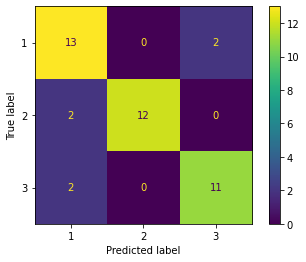

In [33]:
metrics.ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(ytest,ABCpred), display_labels=DTC.classes_).plot()

Используем GradientBoost со значениями по умолчанию:

In [34]:
GBC = ensemble.GradientBoostingClassifier()
GBC.fit(xtrain,ytrain)
GBCpred = GBC.predict(xtest)
print(metrics.classification_report(ytest,GBCpred,digits=5))
print('AUC (area under ROC curve) = ', metrics.roc_auc_score(ytest,GBC.predict_proba(xtest),average='macro',multi_class='ovr'))

              precision    recall  f1-score   support

           1    0.88235   1.00000   0.93750        15
           2    1.00000   0.85714   0.92308        14
           3    1.00000   1.00000   1.00000        13

    accuracy                        0.95238        42
   macro avg    0.96078   0.95238   0.95353        42
weighted avg    0.95798   0.95238   0.95204        42

AUC (area under ROC curve) =  0.9882590073066263


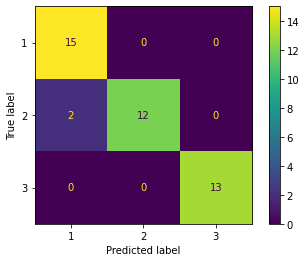

In [35]:
metrics.ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(ytest,GBCpred), display_labels=DTC.classes_).plot()

In [36]:
print('Before boosting: ')
print(metrics.classification_report(ytest,DTCpred,digits=5))
print('AUC (area under ROC curve) = ', metrics.roc_auc_score(ytest,DTC.predict_proba(xtest),average='macro',multi_class='ovr'))
GBC = ensemble.GradientBoostingClassifier(init=DTC)
GBC.fit(xtrain,ytrain)
GBCpred = GBC.predict(xtest)
print('After boosting: ')
print(metrics.classification_report(ytest,GBCpred,digits=5))
print('AUC (area under ROC curve) = ', metrics.roc_auc_score(ytest,GBC.predict_proba(xtest),average='macro',multi_class='ovr'))

Before boosting: 
              precision    recall  f1-score   support

           1    0.78571   0.73333   0.75862        15
           2    1.00000   0.85714   0.92308        14
           3    0.75000   0.92308   0.82759        13

    accuracy                        0.83333        42
   macro avg    0.84524   0.83785   0.83643        42
weighted avg    0.84609   0.83333   0.83479        42

AUC (area under ROC curve) =  0.9161649334063128
After boosting: 
              precision    recall  f1-score   support

           1    0.78947   1.00000   0.88235        15
           2    1.00000   0.85714   0.92308        14
           3    1.00000   0.84615   0.91667        13

    accuracy                        0.90476        42
   macro avg    0.92982   0.90110   0.90737        42
weighted avg    0.92481   0.90476   0.90655        42

AUC (area under ROC curve) =  0.982307768049421


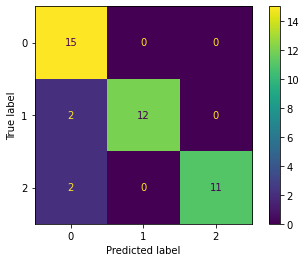

In [37]:
metrics.ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(ytest,GBCpred), display_labels=DTC.classes_).plot()

In [38]:
HGBC = ensemble.HistGradientBoostingClassifier()
HGBC.fit(xtrain,ytrain)
HGBCpred = HGBC.predict(xtest)
print('After boosting: ')
print(metrics.classification_report(ytest,HGBCpred,digits=5))
print('AUC (area under ROC curve) = ', metrics.roc_auc_score(ytest,HGBC.predict_proba(xtest),average='macro',multi_class='ovr'))

After boosting: 
              precision    recall  f1-score   support

           1    0.72222   0.86667   0.78788        15
           2    1.00000   0.85714   0.92308        14
           3    0.83333   0.76923   0.80000        13

    accuracy                        0.83333        42
   macro avg    0.85185   0.83101   0.83699        42
weighted avg    0.84921   0.83333   0.83670        42

AUC (area under ROC curve) =  0.9713221542997131


#### Необязательная, но интересная часть.
##### Проанализируем, имеет ли место переобучение.

In [39]:
DTC = tree.DecisionTreeClassifier(max_depth=2)
DTC.fit(xtrain,ytrain)
DTCpred = DTC.predict(xtrain)
print('On TRAIN data: ')
print(metrics.classification_report(ytrain,DTCpred,digits=5))
print('AUC (area under ROC curve) = ', metrics.roc_auc_score(ytrain,DTC.predict_proba(xtrain),average='macro',multi_class='ovr'))
DTCpred = DTC.predict(xtest)
print('On TEST data: ')
print(metrics.classification_report(ytest,DTCpred,digits=5))
print('AUC (area under ROC curve) = ', metrics.roc_auc_score(ytest,DTC.predict_proba(xtest),average='macro',multi_class='ovr'))

On TRAIN data: 
              precision    recall  f1-score   support

           1    1.00000   0.80000   0.88889        55
           2    0.98246   1.00000   0.99115        56
           3    0.85075   1.00000   0.91935        57

    accuracy                        0.93452       168
   macro avg    0.94440   0.93333   0.93313       168
weighted avg    0.94351   0.93452   0.93331       168

AUC (area under ROC curve) =  0.9667507516798367
On TEST data: 
              precision    recall  f1-score   support

           1    0.84615   0.73333   0.78571        15
           2    1.00000   0.85714   0.92308        14
           3    0.76471   1.00000   0.86667        13

    accuracy                        0.85714        42
   macro avg    0.87029   0.86349   0.85849        42
weighted avg    0.87223   0.85714   0.85656        42

AUC (area under ROC curve) =  0.9161649334063128


Можно заметить, что точность классификации на тренировочных данных выше, чем на тестовых данных, что нормально и ожидаемо.
<br> Высокое качество классификации следует из набора данных и распределения определенных характеристик по классам, например, по периметру или площади, можно с достаточно высокой вероятностью правильно определить класс.